# Setup and Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.1 Install Dependencies

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
cd /content/drive/MyDrive/TugasAkhir/dataset2

/content/drive/.shortcut-targets-by-id/1v5oPJ5JOYzUAa4YaNYNkGN60oi8ikFKw/dataset2


In [4]:
directories = os.listdir()

filename = []
label = []
for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

/content/drive/.shortcut-targets-by-id/1v5oPJ5JOYzUAa4YaNYNkGN60oi8ikFKw/dataset2/fresh
fresh/20221024_071252.jpg
fresh/20221024_071335.jpg
fresh/20221024_071411.jpg
fresh/20221024_071445.jpg
fresh/20221024_071514.jpg
fresh/20221024_071546.jpg
fresh/20221024_071610.jpg
fresh/20221024_091728.jpg
fresh/20221024_091800.jpg
fresh/20221024_092018.jpg
fresh/20221024_092036.jpg
fresh/20221024_092106.jpg
fresh/20221028_193042.jpg
fresh/20221028_193103.jpg
fresh/20221028_193124.jpg
fresh/20221028_193147.jpg
fresh/20221028_193211(0).jpg
fresh/20221028_193242.jpg
fresh/20221028_193308.jpg
fresh/20221028_193333.jpg
fresh/20221028_193353.jpg
fresh/20221028_193416.jpg
fresh/20221028_193431.jpg
fresh/20221028_193447.jpg
fresh/20221028_193510.jpg
fresh/20221028_193524.jpg
fresh/20221028_193538.jpg
fresh/20221028_193551.jpg
fresh/20221028_193618.jpg
fresh/20221028_193640.jpg
fresh/20221028_193703(0).jpg
fresh/20221028_193719.jpg
fresh/20221028_193753.jpg
fresh/20221028_193806.jpg
fresh/20221028_193828.

In [5]:
print(len(filename))

540


Save List of Images to Pandas

In [6]:
import pandas as pd

data = {"filename": filename,
        "label": label
        }

df = pd.DataFrame(data = data)

Print List of Images files

In [7]:
print(df)

                               filename        label
0             fresh/20221024_071252.jpg        fresh
1             fresh/20221024_071335.jpg        fresh
2             fresh/20221024_071411.jpg        fresh
3             fresh/20221024_071445.jpg        fresh
4             fresh/20221024_071514.jpg        fresh
..                                  ...          ...
535     notfeasible/20221031_175526.jpg  notfeasible
536  notfeasible/20221031_175536(0).jpg  notfeasible
537     notfeasible/20221031_175548.jpg  notfeasible
538     notfeasible/20221031_175600.jpg  notfeasible
539     notfeasible/20221031_175611.jpg  notfeasible

[540 rows x 2 columns]


Randomize the List of Image Files

In [8]:
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

                            filename        label
98      fresh/20221028_221326(0).jpg        fresh
282         good/20221029_025523.jpg         good
362  notfeasible/20221024_152003.jpg  notfeasible
472  notfeasible/20221029_094307.jpg  notfeasible
396  notfeasible/20221029_065022.jpg  notfeasible
..                               ...          ...
128        fresh/20221031_072352.jpg        fresh
199      good/20221029_004212(0).jpg         good
369  notfeasible/20221024_173259.jpg  notfeasible
373  notfeasible/20221024_191716.jpg  notfeasible
490  notfeasible/20221031_160952.jpg  notfeasible

[540 rows x 2 columns]


Cross Validation

In [9]:
from sklearn.model_selection import KFold

train_data = df_shuffled

Y = train_data[['label']]

# number of split is 4
kf = KFold(n_splits = 4)

Preprocessing the Training Set

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255)

Preprocessing the Test Set

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

## Building the CNN Model

Define the directories of dataset

In [12]:
image_dir = '/content/drive/MyDrive/TugasAkhir/dataset2'

Method for save the best CNN model

In [13]:
def get_model_name(k):
  return 'model_' + str(k) + '.h5'

Import and define the performance metric

In [14]:
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

# Build and Train the CNN Model

In [15]:
save_dir = '/saved_models/'
fold_var = 1

# Looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir,
                                                           x_col = "filename", y_col = "label",
                                                           target_size = (256, 256), batch_size = 32,
                                                           class_mode = "categorical", shuffle = False)
  
  valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir,
                                                           x_col = "filename", y_col = "label",
                                                           target_size = (256, 256), batch_size = 32,
                                                           class_mode = "categorical", shuffle = False)
  
  model = Sequential()
  model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(16, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.summary

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy', verbose = 1,
                               save_best_only = True, mode = 'max')
  
  callback_list = [checkpoint]

  hist = model.fit(train_data_generator, 
                   epochs = 30, 
                   callbacks = callback_list, 
                   validation_data = valid_data_generator)
  
  model.load_weights("/saved_models/model_" + str(fold_var) + ".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  # get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  # Karena output multilable adalah 0 - 1 dari tiap class maka diambil yg terbesar
  y_predict_labels = np.argmax(y_predict, axis=1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average = 'weighted')
  rec = recall_score(y_predict_labels, y, average = 'weighted')
  f1score = f1_score(y_predict_labels, y, average = 'weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("accuracy: ", results['accuracy'])
  print("precision: ", prec)
  print("recall: ", rec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1

Found 405 validated image filenames belonging to 3 classes.
Found 135 validated image filenames belonging to 3 classes.
Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 1.1582 - accuracy: 0.3086
Epoch 1: val_accuracy improved from -inf to 0.38519, saving model to /saved_models/model_1.h5
13/13 [==============================] - 163s 12s/step - loss: 1.1582 - accuracy: 0.3086 - val_loss: 1.0895 - val_accuracy: 0.3852
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 1.0775 - accuracy: 0.4963
Epoch 2: val_accuracy improved from 0.38519 to 0.62963, saving model to /saved_models/model_1.h5
13/13 [==============================] - 27s 2s/step - loss: 1.0775 - accuracy: 0.4963 - val_loss: 1.0441 - val_accuracy: 0.6296
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.9861 - accuracy: 0.5086
Epoch 3: val_accuracy did not improve from 0.62963
13/13 [==============================] - 27s 2s/step - loss: 0.9861 - accuracy: 0.5086 - val_los

In [ ]:
  model.summary()

# View the Performance Graphs

Acuracy, Precision, Recall, F1 Score **Ke 5 Fold**

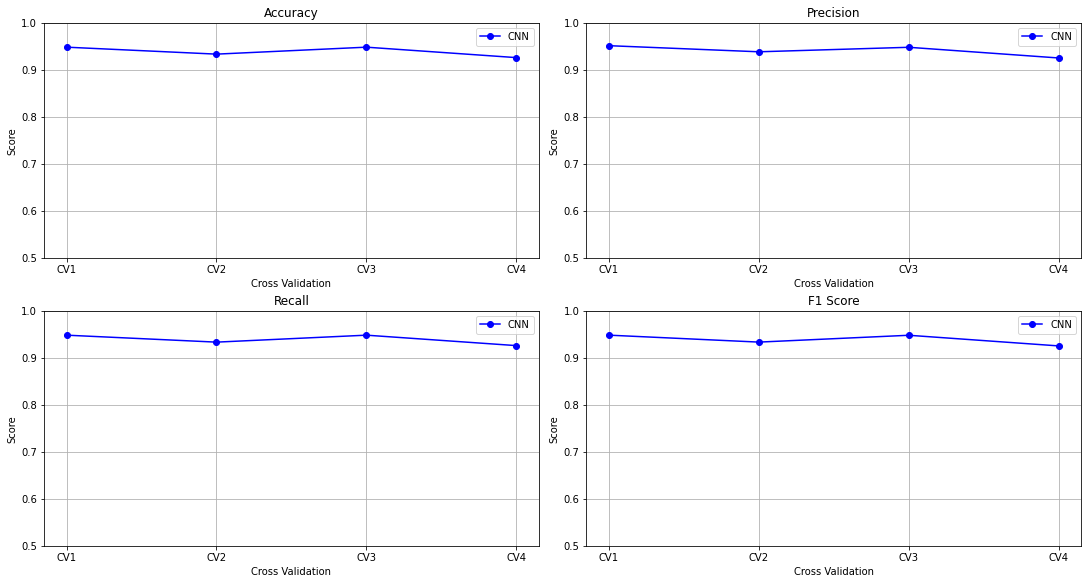

In [16]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label="CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label="CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label="CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label="CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5, 1))
axs[1,1].grid()
axs[1,1].legend()

Accuracy dan Loss untuk **Ke 5 Fold**

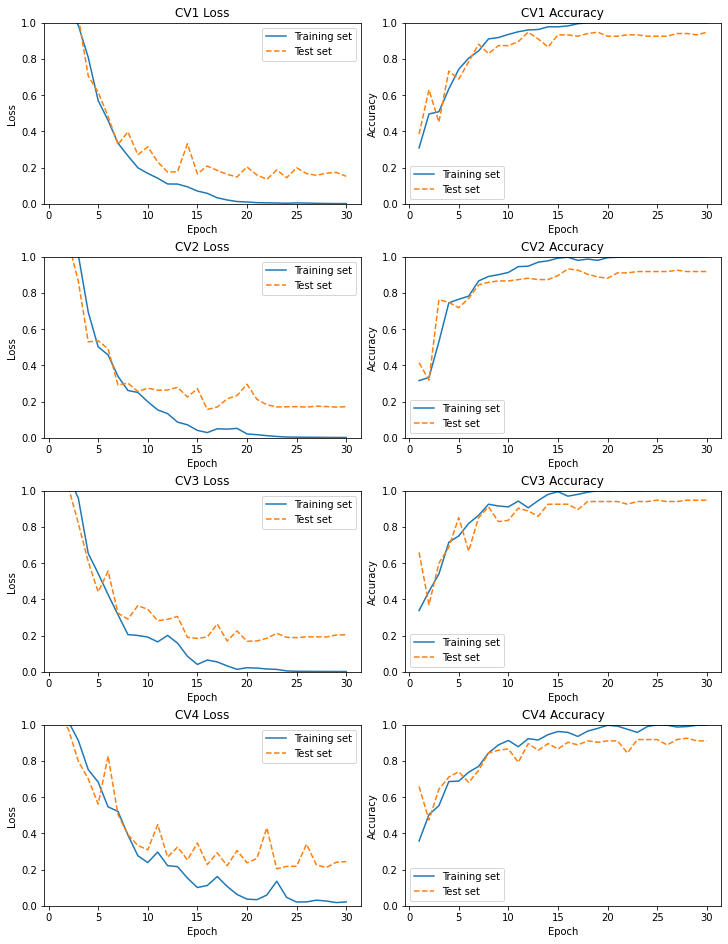

In [21]:
n_epochs = 20
#set the x axis from 1
x_axis = np.arange(1, 31)

fig, ax = plt.subplots(4, 2, constrained_layout=True, figsize=(10,13))

for i in range(4):
  for j in range(2):
    if(j == 0):
      ax[i,j].set_title('CV' + str(i+1) + ' Loss')
      ax[i,j].set_ylabel('Loss')
      ax[i,j].plot(x_axis, LOSS[i], label='Training set')
      ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
    else:
      ax[i,j].set_title('CV' + str(i+1) + ' Accuracy')
      ax[i,j].set_xlabel('Epoch')
      ax[i,j].set_ylabel('Accuracy')
      ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
      ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_ylim((0, 1))
    ax[i,j].set_xticks(np.arange(0, 31, 5))
    ax[i,j].legend()



---



---



4.2 Testing on New Data



*   Percobaan 1 (Banjar Segar)



In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_segar.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_baik.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_tidaklayak.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

# Convert to TensorFlow Lite

5.1 Save model

In [22]:
from tensorflow.keras.models import load_model

In [23]:
model.save(os.path.join('models', 'model-30epoch_4-foldcv.h5'))

5.2 Convert to tflite

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

5.3 Save .tflite model

In [25]:
with open("model-30epoch_4-foldcv.tflite", "wb") as f:
  f.write(tflite_model)

In [26]:
tflite_model_path = "model-30epoch_4-foldcv.tflite"



---



---

